In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\muthuraj.jayaseelan\diabetes.csv")
df.shape

(768, 9)

In [139]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [140]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [141]:
x,y = df.drop("Outcome",axis=1),df["Outcome"]

In [142]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [143]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [144]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=0)

In [145]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [146]:
y_predict = dtc.predict(x_test)
datasetComparison = pd.DataFrame({'Actual ':y_test,'Predict ':y_predict})
print(datasetComparison)

     Actual   Predict 
661        1         1
122        0         0
113        0         0
14         1         1
529        0         0
..       ...       ...
476        1         0
482        0         0
230        1         0
527        0         0
380        0         0

[154 rows x 2 columns]


In [147]:
#accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_predict)
print(accuracy)

0.7727272727272727


In [148]:
#generate confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_predict)
print(cf_matrix)

[[89 18]
 [17 30]]


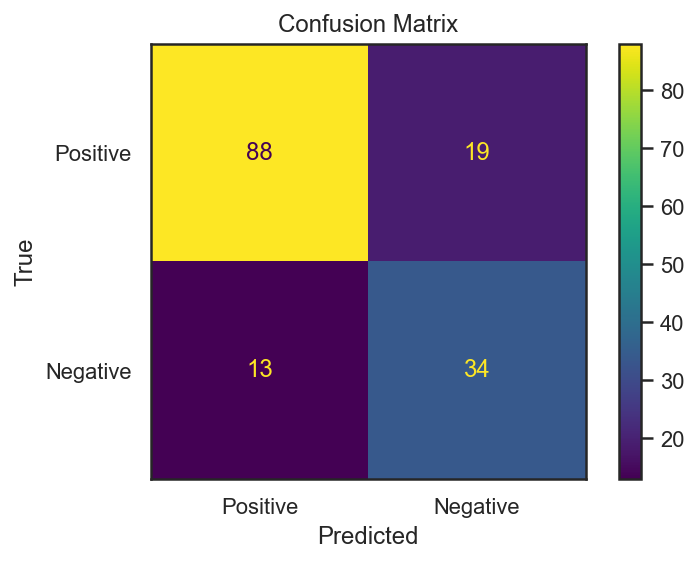

In [152]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cf_matrix)
disp.plot()
disp.ax_.set(xlabel='Predicted',ylabel='True')
disp.ax_.set_title("Confusion Matrix")
plt.show()

In [153]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       107
           1       0.62      0.64      0.63        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.77      0.77      0.77       154

